In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
from google.oauth2 import service_account
from google.cloud import bigquery
# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "GOOGLE_API_CREDENTIALS.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

print(credentials.project_id)

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id,
)

geometric-orbit-260520


In [4]:
train_table = client.list_rows('bqml_example.geotab_intersection_congestion_train')
print("Total rows: {}".format(train_table.total_rows))

Total rows: 857409


In [5]:
df_train = train_table.to_dataframe()

In [7]:
df_train_Boston = df_train[df_train['City']=='Boston'].copy()

In [26]:
df_train_Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182050 entries, 0 to 853739
Data columns (total 28 columns):
RowId                      182050 non-null int64
IntersectionId             182050 non-null int64
Latitude                   182050 non-null float64
Longitude                  182050 non-null float64
EntryStreetName            180398 non-null object
ExitStreetName             181052 non-null object
EntryHeading               182050 non-null object
ExitHeading                182050 non-null object
Hour                       182050 non-null int64
Weekend                    182050 non-null bool
Month                      182050 non-null int64
Path                       182050 non-null object
TotalTimeStopped_p20       182050 non-null int64
TotalTimeStopped_p40       182050 non-null int64
TotalTimeStopped_p50       182050 non-null int64
TotalTimeStopped_p60       182050 non-null int64
TotalTimeStopped_p80       182050 non-null int64
TimeFromFirstStop_p20      182050 non-null int64

In [29]:
df_train_Boston[(df_train_Boston['Longitude']==-71.17265) & 
#                 (df_train_Boston['EntryHeading']!='N') & 
#                 (df_train_Boston['EntryHeading']!='S') &
                (df_train_Boston['Weekend']==False) &
                (df_train_Boston['Hour']==7) &
                (df_train_Boston['Month']==7) ]

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
40516,2080367,35,42.27153,-71.17265,Spring Street,Spring Street,SW,SW,7,False,...,48,72,102,104,0.0,72.7,85.5,121.7,147.9,Boston
233949,2080368,35,42.27153,-71.17265,Spring Street,Veterans Of Foreign Wars Parkway,SW,S,7,False,...,49,53,61,79,0.0,62.9,70.1,70.2,83.5,Boston
268040,2080369,35,42.27153,-71.17265,Veterans Of Foreign Wars Parkway,Veterans Of Foreign Wars Parkway,NW,NW,7,False,...,40,49,60,81,0.0,85.9,104.4,115.7,149.8,Boston
268100,2080370,35,42.27153,-71.17265,Veterans Of Foreign Wars Parkway,Veterans Of Foreign Wars Parkway,SE,SE,7,False,...,59,77,77,115,55.1,73.5,76.8,79.9,718.1,Boston


In [52]:
    temp = df_train_Boston[(df_train_Boston['Weekend']==False) &
                    (df_train_Boston['Hour']==h) &
                    (df_train_Boston['Month']==7)].groupby(['Latitude', 'Longitude'])['TotalTimeStopped_p50'].mean().reset_index()


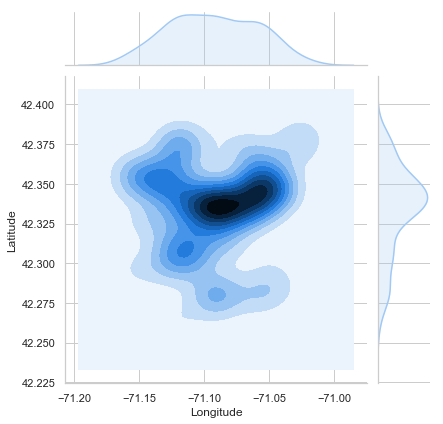

In [54]:
sns.jointplot(x=temp['Longitude'], y=temp['Latitude'], kind="kde");

ValueError: scatter requires x column to be numeric

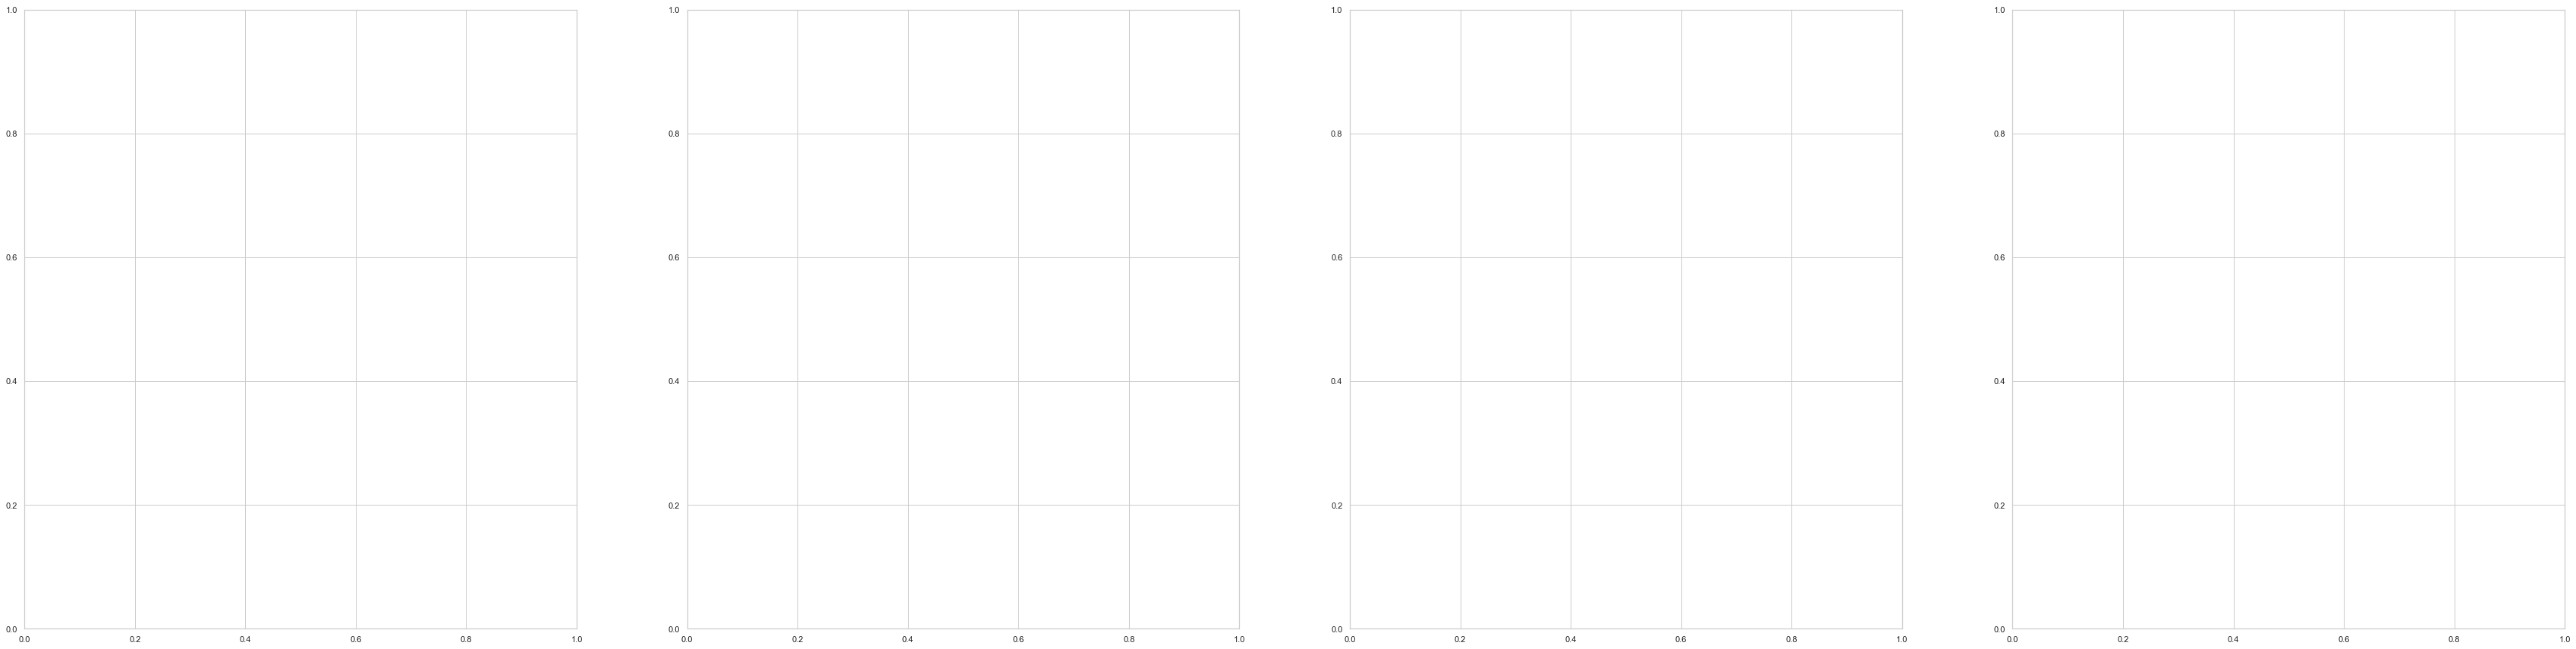

In [69]:
for h in range(0, 23):
    f, axs = plt.subplots(1, 4, figsize=(60, 15))
    
    Weekend=True
    
    temp_1 = df_train_Boston[(df_train_Boston['Weekend']==Weekend) &
#                     (df_train_Boston['EntryHeading']=='N') &      
                    ( (df_train_Boston['EntryStreetName']=='Spring Street') | (df_train_Boston['ExitStreetName']=='Spring Street') ) &
                    (df_train_Boston['Hour']==h) &
                    (df_train_Boston['Month']==6)].groupby(['Latitude', 'Longitude'])['TotalTimeStopped_p50'].mean().reset_index()

    temp_2 = df_train_Boston[(df_train_Boston['Weekend']==Weekend) &
#                     (df_train_Boston['EntryHeading']=='N') &      
                    (df_train_Boston['Hour']==h) &
                    (df_train_Boston['Month']==7)].groupby(['Latitude', 'Longitude'])['TotalTimeStopped_p50'].mean().reset_index()

    temp_3 = df_train_Boston[(df_train_Boston['Weekend']==Weekend) &
#                     (df_train_Boston['EntryHeading']=='N') &      
                    (df_train_Boston['Hour']==h) &
                    (df_train_Boston['Month']==8)].groupby(['Latitude', 'Longitude'])['TotalTimeStopped_p50'].mean().reset_index()

    temp_4 = df_train_Boston[(df_train_Boston['Weekend']==Weekend) &
#                     (df_train_Boston['EntryHeading']=='N') &      
                    (df_train_Boston['Hour']==h) &
                    (df_train_Boston['Month']==9)].groupby(['Latitude', 'Longitude'])['TotalTimeStopped_p50'].mean().reset_index()

    
#     sns.jointplot(x=temp['Longitude'], y=temp['Latitude'], kind="kde");
    
    temp_1.plot(kind="scatter", x="Longitude", y="Latitude",
        s=temp_1['TotalTimeStopped_p50']*10, 
#       label="TotalTimeStopped_p50",
      c="TotalTimeStopped_p50", 
      cmap=plt.get_cmap("jet"),
      colorbar=True, 
      alpha=0.4, 
#       figsize=(15,10),
    xlim=(-71.18, -71.02),
    ylim=(42.22, 42.40),
     vmin=0, vmax=130, ax=axs[0]
      )

    temp_2.plot(kind="scatter", x="Longitude", y="Latitude",
        s=temp_2['TotalTimeStopped_p50']*10, 
#       label="TotalTimeStopped_p50",
      c="TotalTimeStopped_p50", 
      cmap=plt.get_cmap("jet"),
      colorbar=True, 
      alpha=0.4, 
#       figsize=(15,10),
    xlim=(-71.18, -71.02), 
                    ylim=(42.22, 42.40),
     vmin=0, vmax=130, ax=axs[1]
      )
    
    temp_3.plot(kind="scatter", x="Longitude", y="Latitude",
        s=temp_3['TotalTimeStopped_p50']*10, 
#       label="TotalTimeStopped_p50",
      c="TotalTimeStopped_p50", 
      cmap=plt.get_cmap("jet"),
      colorbar=True, 
      alpha=0.4, 
#       figsize=(15,10),
    xlim=(-71.18, -71.02), 
                    ylim=(42.22, 42.40),
     vmin=0, vmax=130, ax=axs[2]
      )
    
    temp_4.plot(kind="scatter", x="Longitude", y="Latitude",
        s=temp_4['TotalTimeStopped_p50']*10, 
#       label="TotalTimeStopped_p50",
      c="TotalTimeStopped_p50", 
      cmap=plt.get_cmap("jet"),
      colorbar=True, 
      alpha=0.4, 
#       figsize=(15,10),
    xlim=(-71.18, -71.02),
                    ylim=(42.22, 42.40),
     vmin=0, vmax=130, ax=axs[3]
      )
    
    # # plt.legend()
    plt.show()    

In [64]:
temp_1.plot?

Signature:   temp_1.plot(*args, **kwargs)
Type:        PlotAccessor
String form: <pandas.plotting._core.PlotAccessor object at 0x1a16e38be0>
File:        /anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py
Docstring:  
Make plots of Series or DataFrame using the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
   